# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



Import pandas library to read dataframe and show first five rows of our food_claims dataframe.

In [2]:
import pandas as pd
food_claims = pd.read_csv('food_claims_2212.csv')
food_claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


## Cleaning and validating dataframe

### claim_id

In [8]:
print((food_claims.claim_id.describe()))
print('Unique no of values in the column is', len(food_claims.claim_id.unique()))
print('No of missing values in the column is', food_claims.claim_id.isna().sum())

count    2000.000000
mean     1000.500000
std       577.494589
min         1.000000
25%       500.750000
50%      1000.500000
75%      1500.250000
max      2000.000000
Name: claim_id, dtype: float64
Unique no of values in the column is 2000
No of missing values in the column is 0


The data in this column matches the given column description. Claim_id column have 2000 rows having 2000 unique values and don't have any missing value.

### time_to_close

In [16]:
print('No of missing values is', food_claims.time_to_close.isna().sum())
print('Smallest value in the column is', food_claims.time_to_close.min())

No of missing values is 0
Smallest value in the column is 76


The data in this column matches the given column description. There is no missing value in time_to_close column. The minimum value in the column is 76 which indicates that all the values in this column is positive.

### claim_amount

In [19]:
print('No of missing values is', food_claims.claim_amount.isna().sum())
food_claims.time_to_close.describe()

No of missing values is 0


count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64

The data in this column matches the given column description. There is no missing value in claim_amount column. All the values are rounded upto 2 decimal places.

### amount_paid

In [20]:
print('No of missing values is', food_claims.amount_paid.isna().sum())

No of missing values is 36


 The data in this column does not matches with the given column description. There are 36 missing values in this column. We will replace missing value with the median of this column to match the description.

In [22]:
median = round(food_claims.amount_paid.median(),2)
food_claims.amount_paid = food_claims.amount_paid.fillna(median)
print('No of missing values is', food_claims.amount_paid.isna().sum())

No of missing values is 0


All the missing values have been replaced by median round upto 2 decimal places and the column values matches with column description.

### location

In [26]:
print('No of missing values is', food_claims.location.isna().sum())
print('Values in column are ', food_claims.location.unique())

No of missing values is 0
Values in column are  ['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']


The values of the column matches the column description. There is no missing value in the column and all the values are , one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.

### individuals_on_claim

In [27]:
print('No of missing values is', food_claims.individuals_on_claim.isna().sum())
print('Minimum value in the column is', food_claims.individuals_on_claim.min())

No of missing values is 0
Minimum value in the column is 1


The column values matches the column decription and there is no missing value in the column.

### linked_cases

In [35]:
print('No of missing values is', food_claims.linked_cases.isna().sum())
print('Unique values in the column are', food_claims.linked_cases.unique())

No of missing values is 0
Unique values in the column are [False  True]


The column values does not matches the column description and there is 26 missing values in the column.

In [29]:
food_claims.linked_cases = food_claims.linked_cases.fillna(False)
print('No of missing values is', food_claims.linked_cases.isna().sum())

No of missing values is 0


Missing values has been replaced with False and the values in the column matches the column description.

### cause

In [33]:
print('No of missing values is', food_claims.cause.isna().sum())
print('Unqiue values in the column are', food_claims.cause.unique())

No of missing values is 0
Unqiue values in the column are ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


The column values does not matches the column description. There are zero missing values but there are some typing mistakes in the column values.

In [34]:
food_claims.cause = food_claims.cause.str.lower()
food_claims.cause = food_claims.cause.str.lstrip()
food_claims.cause = food_claims.cause.replace('vegetables', 'vegetable')
print('Unqiue values in the column are', food_claims.cause.unique())

We converted all the values to lower case and there were some values that have left space with Meat so we had removed that as well. Also, we had replaced vegetables with vegetable to match the column values with column description.

## Task 2

## No of claims in each location

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


## a. State which category of the variable location has the most observations

**RECIFE** has the highest number of observations, totaling 885 entries.

## b. Explain whether the observations are balanced across categories of the variable location

The distribution of observations among different categories of the "location" variable is noticeably uneven. RECIFE stands out with the highest count, totaling 885 observations, followed by SAO LUIS with 517 entries in the second position. Comparatively, FORTALEZA and NATAL hold the third and fourth positions, each with 311 and 287 observations, respectively. The significant gap between the first and second positions, as well as the third and fourth positions, suggest that the observations are not well-balanced across the categories of the variable.

## Task 3

##  Distribution of time to close for all claims

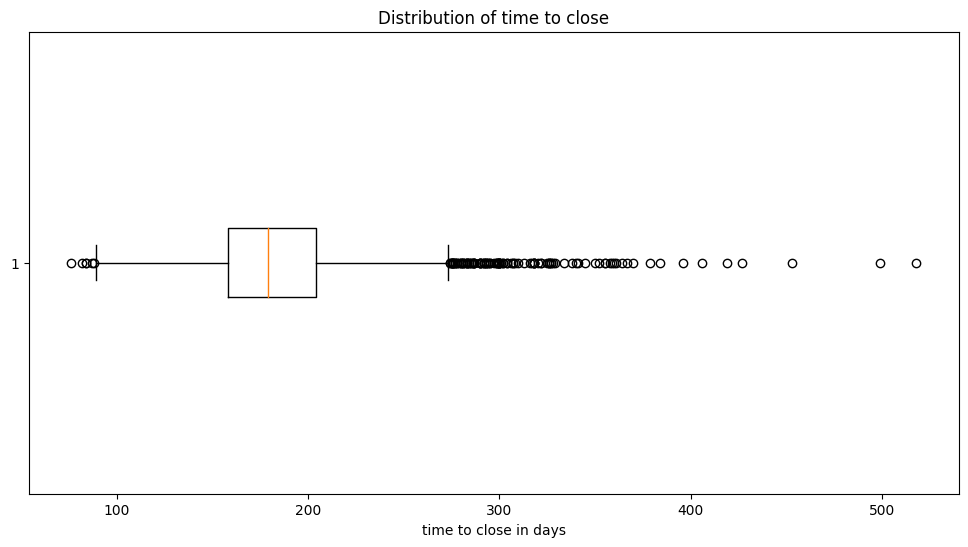

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.boxplot(food_claims.time_to_close, vert=False)
plt.title('Distribution of time to close')
plt.xlabel('time to close in days')
plt.show()

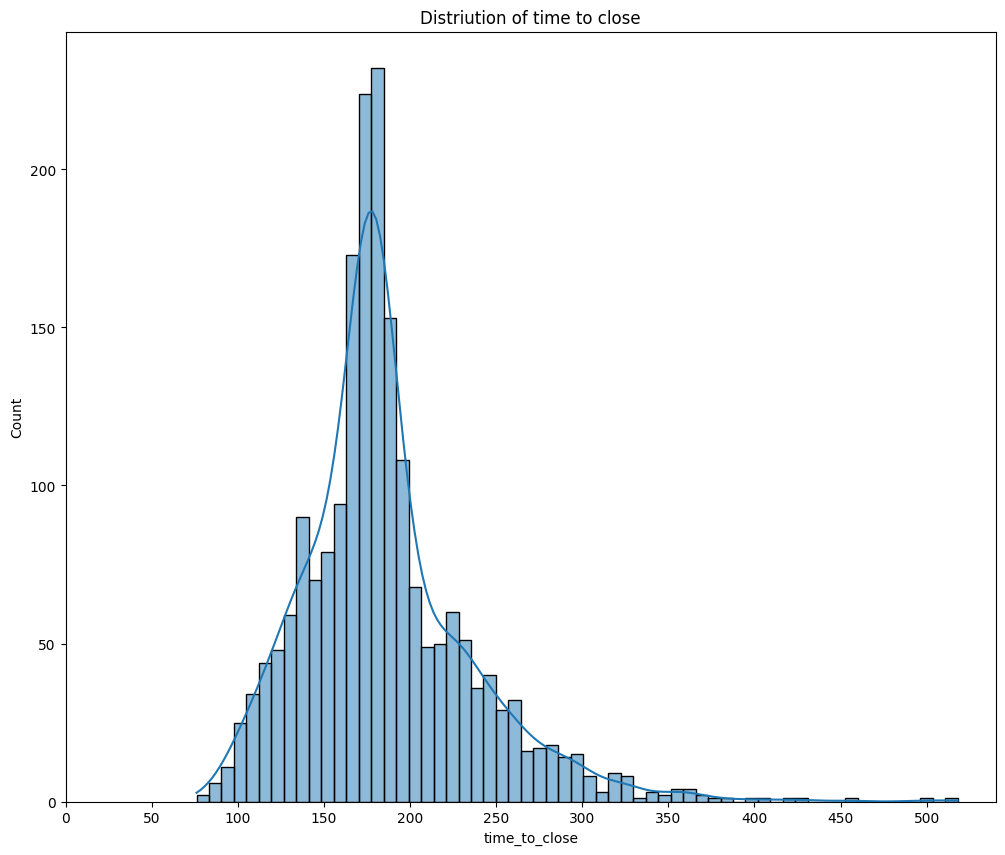

In [90]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(data=food_claims, x='time_to_close', kde=True)
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
x_labels = ['0', '50', '100', '150', '200', '250', '300', '350', '400', '450', '500']
plt.xticks(x_ticks, x_labels)
plt.title('Distriution of time to close')
plt.show()


we can see from the above graphs that most oservations had less than 250 time to close. The distribution of the time to close is right skewed. There are good amount of outliers that have value higher than 300. 75% of data points are less than 205 and mean of the column is 185.568. Majority of data points are in the range of 150 to 200.

## Task 4

## the relationship between time to close and location

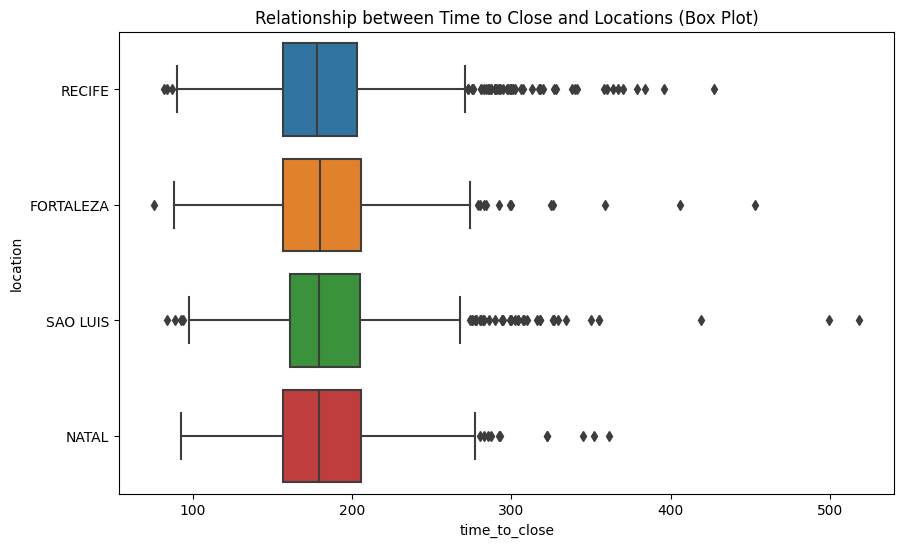

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_to_close', y='location', data=food_claims, orient='h')
plt.xlabel('time_to_close')
plt.ylabel('location')
plt.title('Relationship between Time to Close and Locations (Box Plot)')
plt.show()


In the given visualization, you can observe the distribution of time to close across all four locations. From the plot, it is evident that there are more outliers in RECIFE and SAO LUIS. These outliers should be investigated by the legal team to improve the quality of work. There are no negative outlier in NATAL and only one negative outlier in FORTALEZA. This shows that lawyers at SAO LUIS and RECIFE sometime closed the claims in very short time that is good for company. Overall, The number of negative outliers are much less than positive outliers.

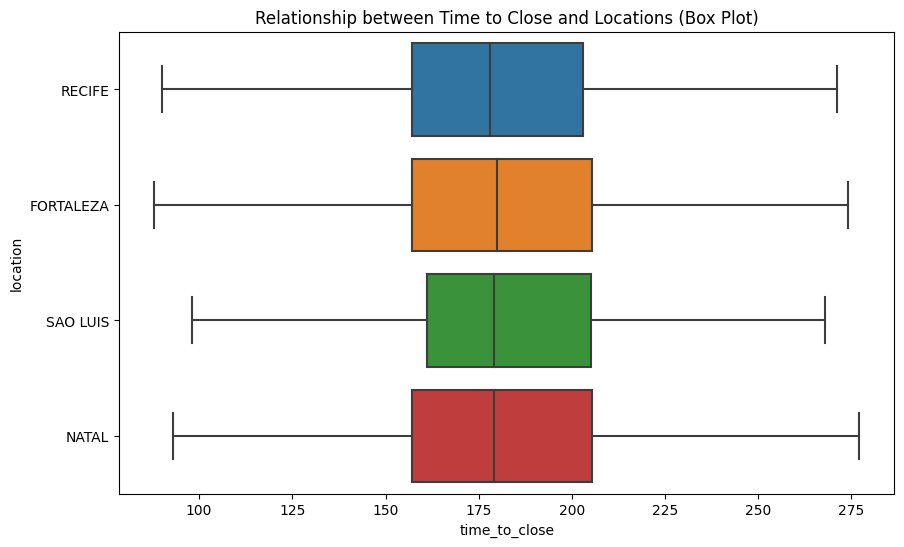

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_to_close', y='location', data=food_claims, orient='h', showfliers=False)
plt.xlabel('time_to_close')
plt.ylabel('location')
plt.title('Relationship between Time to Close and Locations (Box Plot)')
plt.show()

Let's have a look at the distribution without outliers. The Q1 of SAO LUIS is higher and Q3 of RECIFE is smaller when compared to the other locations. ALL locations have approx same mean except FORTALEZA whose mean is a bit higher then others. The min value of SAO LUIS is significantly higher than others.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam